max =  1543.82363232714 min =  1543.735388918226
Energia do zapisu: 1543.7795106226831


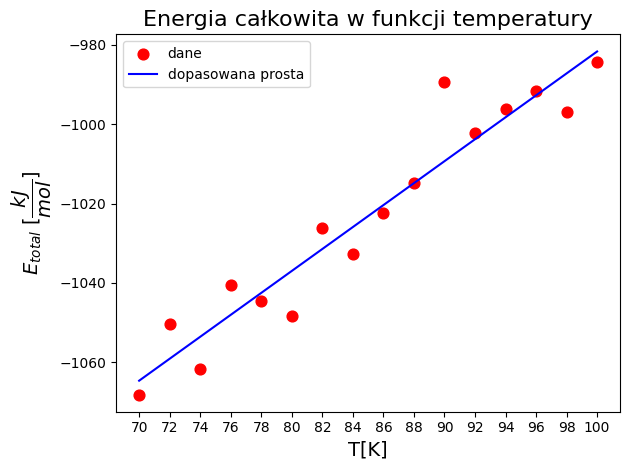

In [488]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline
data_1 = np.loadtxt("energy_total.txt")
data_2 = np.loadtxt("energy_potential.txt")
data_3 = np.loadtxt("energy_kinetic.txt")
data_4 = np.loadtxt("temperature.txt")
data_5 = np.loadtxt("pressure.txt")
time_Data, energy_Data = np.hsplit(data_1, 2)
time_Data_2, energy_Data_2 = np.hsplit(data_2, 2)
time_Data_3, energy_Data_3 = np.hsplit(data_3, 2)
time_Data_4, temp_Data_4 = np.hsplit(data_4, 2)
time_Data_5, press_Data_5 = np.hsplit(data_5, 2)


time = time_Data[:, 0]
total_energy = energy_Data[:, 0]
kinetic_energy = energy_Data_3[:, 0]
potential_energy = energy_Data_2[:, 0]
temp = temp_Data_4[:, 0]
pressure = press_Data_5[:,0]
temps = np.array([70,72,74,76,78,80,82,84,86,88,90,92,94,96,98,100])
energies = np.array([-1068.1389969315142,-1050.327147138515,-1061.8193690240755,-1040.6447656319697,-1044.5527959978208,-1048.4449276835867,-1026.2203256204214,-1032.7038155176374,-1022.3214695374063,-1014.7994106769153,-989.4799982812104,-1002.3538354760813,-996.079227474504,-991.5790249888246,-996.8270035743903,-984.3978176165963])

###dopasowanie
A = np.vstack([temps, np.ones(len(temps))]).T
a, b = np.linalg.lstsq(A, energies, rcond=None)[0]

# Stworzenie danych dopasowanych do funkcji liniowej
y_fit = a * temps + b


######
plt.scatter(temps,energies,s=60, c='r', marker='o',label = 'dane')
plt.plot(temps,y_fit, c='b',label = 'dopasowana prosta')
plt.legend()
#plt.ylim([0.8, 3.5])
plt.ylabel('$E_{total}$ [$\dfrac{kJ}{mol}$]', fontsize=14)
plt.xlabel('T[K]', fontsize=14)
plt.xticks(np.arange(min(temps), max(temps)+1, 2.0))
plt.title('Energia całkowita w funkcji temperatury', fontsize=16)
plt.tight_layout()
plt.savefig('temp_energia.png')
plt.show
print('max = ',np.max(total_energy),'min = ',np.min(total_energy))
print('Energia do zapisu:',(np.max(total_energy) + np.min(total_energy))/2 )


<function matplotlib.pyplot.show(close=None, block=None)>

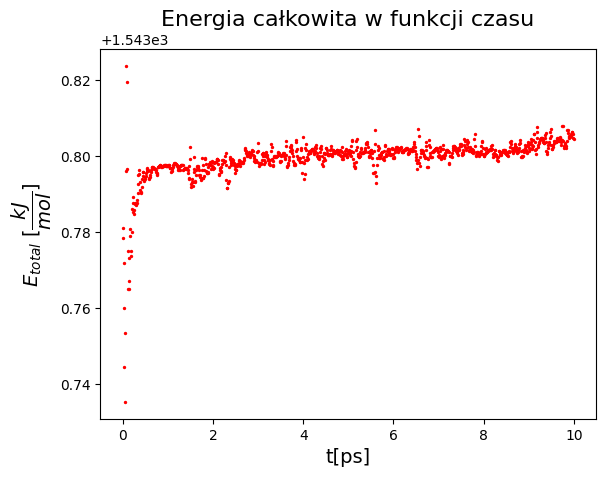

In [489]:
plt.scatter(time,total_energy,s=2, c='r', marker='o')
#plt.legend()
#plt.ylim([0.8, 3.5])
plt.ylabel('$E_{total}$ [$\dfrac{kJ}{mol}$]', fontsize=14)
plt.xlabel('t[ps]', fontsize=14)
plt.title('Energia całkowita w funkcji czasu', fontsize=16)
plt.tight_layout()
plt.savefig('calkowita_czas_n6_1000.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

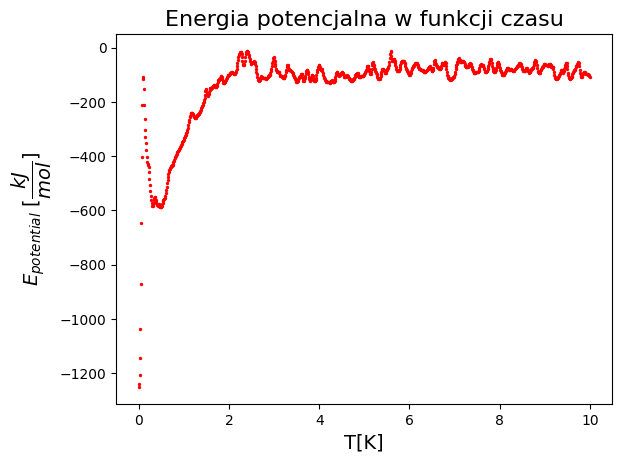

In [490]:
plt.scatter(time,potential_energy,s=2, c='r', marker='o')
#plt.legend()
plt.ylabel('$E_{potential}$ [$\dfrac{kJ}{mol}$]', fontsize=14)
plt.xlabel('T[K]', fontsize=14)
plt.title('Energia potencjalna w funkcji czasu', fontsize=16)
plt.tight_layout()
plt.savefig('potencjalna_czas_n6_1000.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

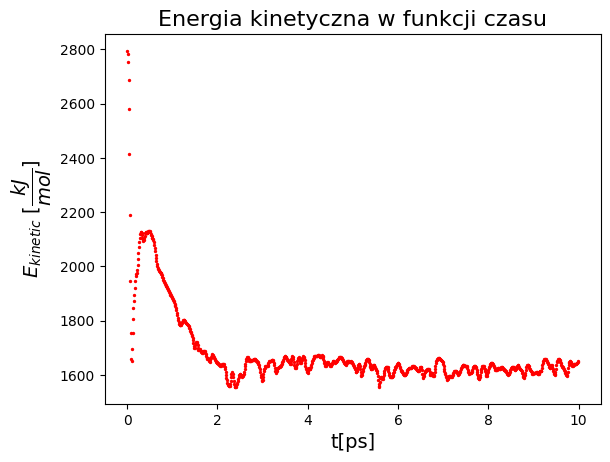

In [491]:
plt.scatter(time,kinetic_energy,s=2, c='r', marker='o')
#plt.legend()
plt.ylabel('$E_{kinetic}$ [$\dfrac{kJ}{mol}$]', fontsize=14)
plt.xlabel('t[ps]', fontsize=14)
plt.title('Energia kinetyczna w funkcji czasu', fontsize=16)
plt.tight_layout()
plt.savefig('kinetyczna_czas_n6_1000.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

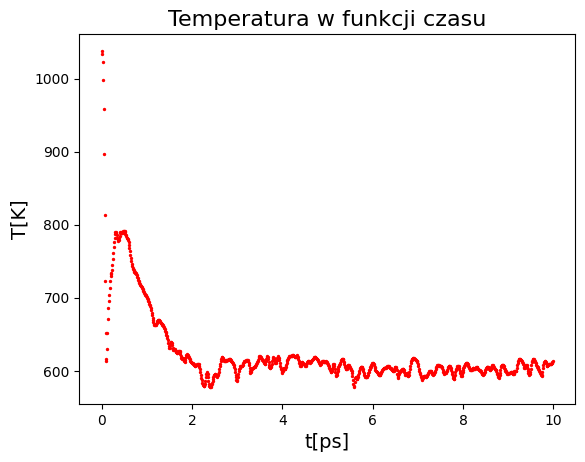

In [492]:
plt.scatter(time,temp,s=2, c='r', marker='o')
#plt.legend()
plt.ylabel('T[K]', fontsize=14)
plt.xlabel('t[ps]', fontsize=14)
plt.title('Temperatura w funkcji czasu', fontsize=16)
plt.tight_layout()
plt.savefig('temperatura_czas_n6_1000.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

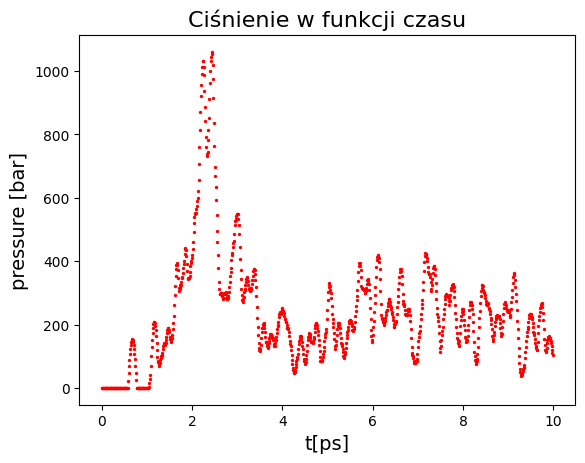

In [493]:
plt.scatter(time,16*pressure,s=2, c='r', marker='o')
#plt.legend()
plt.ylabel('pressure [bar]', fontsize=14)
plt.xlabel('t[ps]', fontsize=14)
plt.title('Ciśnienie w funkcji czasu', fontsize=16)
plt.tight_layout()
plt.savefig('cisnienie_czas_n6_1000.png')
plt.show

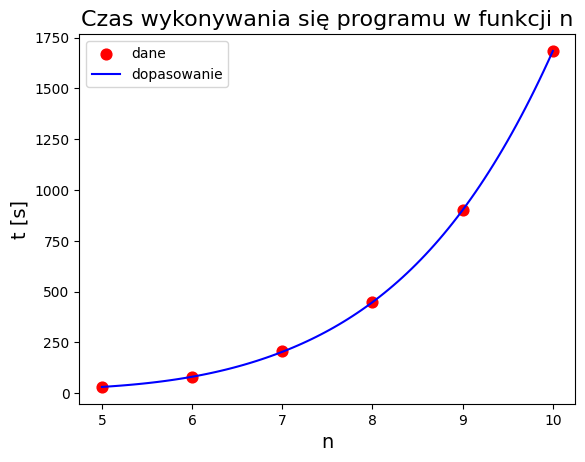

In [494]:
czasy = np.array([42.95,124.83,302.22,645.67,1368.41,2496.18])
czasy_2 =  np.array([31.5,79.53,205.39,448.11,900.92,1684.50])
def exponential_func(x, a, b):
    return a * np.exp(b * x)

spl = UnivariateSpline(n, czasy_2, k=3)  # k=3 oznacza stopień splajnu

# Stworzenie danych dopasowanych do funkcji eksponensy
x_interp = np.linspace(5, 10, 100)  # Nowe punkty x do interpolacji
y_interp = spl(x_interp)  # Interpolowane wartości y
#dla n = 5 max =  -531.6629739469012 min =  -531.664036615374 nowe max =  -523.7048328279279 min =  -523.706115128907
#dla n = 6 max =  -986.3676138517708 min =  -986.3701930075431 nowe max =  -1009.1305193824385 min =  -1009.1329225893274
#dla n= 7 max =  -1688.2810769031591 min =  -1688.2852797199498 nowe max =  -1688.1906105424573 min =  -1688.1948971338293
#n = 8 max =  -2640.5173624880745 min =  -2640.5242828119653 nowe max =  -2632.906241838058 min =  -2632.91334356292
#n= 9  max =  -3912.6729270281216 min =  -3912.682719905133 nowe max =  -3877.8011134845005 min =  -3877.811727384532#
#n = 10 -5540.703401191663 min =  -5540.71658371327  nowe max =  -5540.852756642399 min =  -5540.866106619449
n = np.array([5,6,7,8,9,10])
plt.scatter(n,czasy_2,s=60, c='r', marker='o',label= 'dane')
plt.plot(x_interp,y_interp,c = 'b',label = 'dopasowanie')
plt.ylabel('t [s]', fontsize=14)
plt.xlabel('n', fontsize=14)
plt.title('Czas wykonywania się programu w funkcji n', fontsize=16)
plt.tight_layout()
plt.savefig('wydajnosc.png')
plt.legend()
plt.show()